# COMPETENCIES
**4030.04.01 : Data Interpretation**<br> 
The graduate interprets central tendency, correlations, and variations to inform organizational decisions.

**4030.04.02 : Conducting Parametric Testing**<br />
The graduate conducts parametric hypothesis testing.

# INTRODUCTION
An organization has collected raw data to analyze its operations and support its decision-making processes. The raw data files from the Data Cleaning course have been cleaned and prepared for exploratory analysis.

To compete this assessment, you will access a data dictionary file and its corresponding data flat file. You will analyze the data set using specific techniques, create visualizations, and deliver the results of your analysis.

# SCENARIO
For this task, you will select one of the Data Dictionary and the matching Data Set files from the following link:

You will review the Data Dictionary to understand the needs of the company and to prepare to analyze the data. In this assessment, you will analyze the .csv data file, also referred to as the data set.

# Requirements Summary
  A. Describe a real-world organizational situation or issue in the Data Dictionary you chose
  
  B.  Describe the data analysis

  C.  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data.  

  D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

  E.  Summarize the implications of your data analysis 
  
  F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the tool(s) used. 

  G.  Reference the web sources used to acquire segments of third-party code to support the analysis.

  H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
cmap = "mako"
sns.set(font_scale=2, palette=cmap)

In [148]:
df = pd.read_csv("./src/Medical Data and Dictionary Files/medical_clean.csv")

In [153]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [154]:
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# A1:QUESTION FOR ANALYSIS
---

### 1.  Provide one question that is relevant to your chosen data set. You will answer this question later in the task through an analysis of the cleaned data, using one of the following techniques: chi-square, t-test, or analysis of variance (ANOVA).

Based on the Medical Readmission dataset, does the proportion of diabetic patients differ between patients that were readmitted within a month of release when compared to patients that weren't readmitted? The Null Hypothesis is that the proportion of diabetic patients remains the same across both groups. The Alternative Hypothesis is that proportion of diabetic patients is significantly different. We'll test this hypothesis using the Chi-Square Test for Homogeneity.

# A2:BENEFIT FROM ANALYSIS
---

### 2.  Explain how stakeholders in the organization could benefit from an analysis of the data.




The organization stakeholders benefit from this analysis by learning if the proportion of diabetic patients is statistically related to readmission. If the percentage of diabetic patients in the readmitted patients experiences a significant increase, the hospital chain could explore additional testing and treatments before discharging diabetic patients. Additionally, there may be a confounding variable associated with diabetes that increases the probability of readmission — seeing a trend between diabetes and readmission could prompt further studies to understand what relationships might exist.

Conversely, if a significantly smaller proportion of diabetic patients were readmitted, this could indicate the possibility of safely discharging diabetic patients earlier. This approach would free up hospital beds and resources for other patient groups that may need additional medical attention or a longer stay duration. Furthermore, the hospital chain could periodically perform these tests to ensure discharging certain patient groups earlier doesn't result in increased readmission rates.

If the proportion of diabetic patients readmitted is not statistically significant, this may indicate that diabetes alone isn't a significant contributing factor to patient readmission. Likewise, this may indicate readmission is more correlated with other medical conditions and patient groups. 
 
Ultimately, one of the hospital chain's key objectives is to reduce readmission penalties. Therefore, monitoring these readmission proportions for patient groups will reveal if the hospital chain needs to prioritize reducing readmission conditions and factors within specific groups.

# A3:DATA IDENTIFICATION
---
The submission correctly identifies the specific data within the data set that are relevant to addressing the question from part A1.

### 3.  Identify all of the data in your data set that are relevant to answering your question in part A1.



The dataset includes numerous medical and demographic data features for 10,000 patients. From this dataset, we'll focus on the number of occurrences for 2 data features: Diabetes and ReAdmis. ReAdmis is a nominal value indicating whether a patient was readmitted within a month of their release. "YES" signifies a readmitted patient. "NO" indicates the patient was not. 37% of dataset patients were readmitted patients. Diabetes is a nominal value indicating whether the patient has diabetes. "YES" indicates the patient has diabetes. "NO" signifies the patient doesn't have diabetes. 27% of dataset patients have diabetes. Of the 10,000 patients in the data set, 9% of patients have diabetes and were readmitted.

# √B1:CODE
---
The submission includes a warning- and error-free code to accurately analyze the data set using 1 of the given techniques.

### 1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:
-   chi-square
-   t-test
-   ANOVA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
cmap = "mako"
sns.set(font_scale=2, palette=cmap)

df = pd.read_csv("./src/Medical Data and Dictionary Files/medical_clean.csv")

# cross-tabluate diabetic and readmitted patients frequency observations
# contingency table
table = pd.crosstab(df.Diabetes, df.ReAdmis, margins=True, margins_name="Total")
display(table)

# chi = stats.chisquare(f_obs=f_obs)
oddsr, fisher_p = stats.fisher_exact(table.iloc[:2, :2], alternative="two-sided")

alpha = 0.05

if fisher_p < alpha:
    outcome = "Proportions of diabetic patients differ significantly between patient readmission groups"
else:
    outcome = "No significant difference in proportions of diabetic patients found between patient readmission groups"

print("Odds Ratio:", oddsr.round(4), "P-Value:", fisher_p.round(4))
print("Outcome:", outcome)

ReAdmis,No,Yes,Total
Diabetes,,,
No,4591,2671,7262
Yes,1740,998,2738
Total,6331,3669,10000


Odds Ratio: 0.9859 P-Value: 0.7624
Outcome: No significant difference in proportions of diabetic patients found between patient readmission groups


In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
cmap = "mako"
sns.set(font_scale=2, palette=cmap)


def expected_freq_cnts(row_total, col_total, sample_size):
    """
    calculate the expected frequency for each cell. These values represent what we would expect to see if there really were no relationship between the two variables. We calculate the expected frequency for each cell by multiplying the row total by the column total and dividing by the total number of observations.
    """
    return (row_total * col_total) / sample_size


def calc_chi2(observed, expected, correction=True):
    # Yates’ correction for continuity
    y_offset = 0.5 if correction else 0

    return ((abs(observed - expected) - y_offset) ** 2) / expected


alpha = 0.05

# cross-tabluate diabetic and readmitted patients frequency observations
# contingency table
observed_table = pd.crosstab(df.Anxiety, df.ReAdmis, margins=True, margins_name="Total")
display(observed_table)

# remove "Total" column and row
table_no_total = observed_table.iloc[:2, :2]

# get the table dimensions
r, c = table_no_total.shape

# degress of freedom
DF = (r - 1) * (c - 1)

# dataset size
n, _ = df.shape

expected = {
    "No": {
        "No": expected_freq_cnts(observed_table.Total.No, observed_table.No.Total, n),
        "Yes": expected_freq_cnts(observed_table.Total.Yes, observed_table.No.Total, n),
    },
    "Yes": {
        "No": expected_freq_cnts(observed_table.Total.No, observed_table.Yes.Total, n),
        "Yes": expected_freq_cnts(
            observed_table.Total.Yes, observed_table.Yes.Total, n
        ),
    },
}


expected_table = pd.DataFrame(expected)
display("OBSERVED", table_no_total, "EXPECTED", expected_table)

chi2 = calc_chi2(
    observed=table_no_total.values, expected=expected_table.values, correction=True
).sum()

# 1 DF and 0.05
# source: https://www.mathsisfun.com/data/chi-square-table.html
critical_statistic = 3.841

# P_value is the probability that a chi-square statistic with 1 DF is more extreme than our chi2 of 0.0799.
# p_value = P(Χ^2 > 0.0799)
_, p_value, _, _ = chi2_contingency(table_no_total, correction=True)

if p_value < alpha:
    outcome = "Proportions of diabetic patients differ significantly between patient readmission groups"
else:
    outcome = "No significant difference in proportions of diabetic patients found between patient readmission groups"

display(
    {"alpha": alpha, "chi2": chi2, "DF": DF, "Outcome": outcome, "p-value": p_value}
)

ReAdmis,No,Yes,Total
Anxiety,,,
No,4301,2484,6785
Yes,2030,1185,3215
Total,6331,3669,10000


'OBSERVED'

ReAdmis,No,Yes
Anxiety,,
No,4301,2484
Yes,2030,1185


'EXPECTED'

,No,Yes
No,4295.5835,2489.4165
Yes,2035.4165,1179.5835


{'alpha': 0.05,
 'chi2': 0.047704706965444724,
 'DF': 1,
 'Outcome': 'No significant difference in proportions of diabetic patients found between patient readmission groups',
 'p-value': 0.8271065021209385}

ReAdmis,No,Yes
Diabetes,,
No,4591,2671
Yes,1740,998


0.07983299478166737 0.7775238586920562 1 [[4597.5722 2664.4278]
 [1733.4278 1004.5722]]


,0,1
0,4597.5722,2664.4278
1,1733.4278,1004.5722


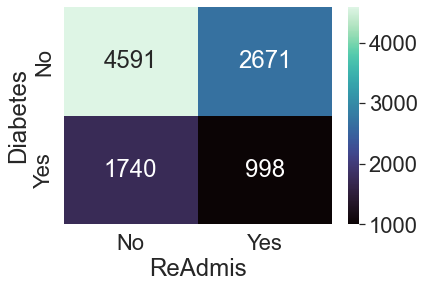

In [220]:
table = pd.crosstab(df.Diabetes, df.ReAdmis)
display(table)
chi_stat, p, dof, expected = chi2_contingency(table, correction=True)

sns.heatmap(table, annot=True, cmap=cmap, fmt="d")

print(chi_stat, p, dof, expected)

pd.DataFrame(expected)

In [ ]:
# calculate t-statistic
# use the distribution table to find critical value
# if t > critical_value reject the null (means test results are statistically significant)

# √B2:OUTPUT
---
The submission includes the output from running the code and the results of all calculations performed.

### 2.  Provide the output and the results of any calculations from the analysis you performed.



In [ ]:
with open("test_output.txt", "w") as f:
    f.write(f"Odds Ratio: {oddsr}\n")
    f.write(f"P-Value: {fisher_p}\n")
    f.write(f"Outcome: {outcome}\n")

# √B3:JUSTIFICATION
---
The justification addresses why the chosen method of analysis was selected. The justified technique is one of the three listed in part B1. The technique is sufficient and appropriate for the chosen data set and addresses the question in part A1. 

### 3.  Justify why you chose this analysis technique.



- The test is useful for categorical data that result from classifying objects in two different ways;
- We want to know whether these two classifications (Diabetes, ReAdmission) are associated

- HOMOGENEITY
    - For each population, the sampling method is simple random sampling.
    - The dependent variable under study is categorical.
    - If sample data are displayed in a contingency table (Populations x Category levels), the expected frequency count for each cell of the table is at least 5.
    - The test is applied to a single categorical variable from two or more different populations (readmission/non-readmission).
    - chi-square test for homogeneity to determine whether the proportion of diabetic patients differed significantly from between re-admitted/non-readmitted patients
    - used a Simple Random Sample
    - The levels of variables are mutually exclusive
    - both variables are categories
    - data represents frequencies and each value is greater than 5
    - data observations are independent




https://stattrek.com/chi-square-test/homogeneity.aspx

# C:UNIVARIATE STATISTICS
---
The submission accurately identifies the distribution of 2 continuous and 2 categorical variables using univariate statistics.

 Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

Write a small paragraph describing your variables. I listed my as skewed, uniform, binomial etc. I also included the counts of the categorical variables and info like the mean, standard deviation, the min, and max for the continuous variables. It must have worked because they passed me.

You may use any of the variables you choose.

Histogram is a good choice
Bar Chart is good for categorical
- show df.describe()



### VitD_Levels (Continous)
---
"VitD_levels" represents a patient’s vitamin D levels measured in ng/mL. This data forms a normal distribution with outlier values below ~12.5 and above ~23 ng/mL.

In [221]:
display("Data Summary", pd.DataFrame(df.VitD_levels.describe()))

'Data Summary'

,VitD_levels
count,10000.000000
mean,17.964262
std,2.017231
min,9.806483
25%,16.626439
50%,17.951122
75%,19.347963
max,26.394449


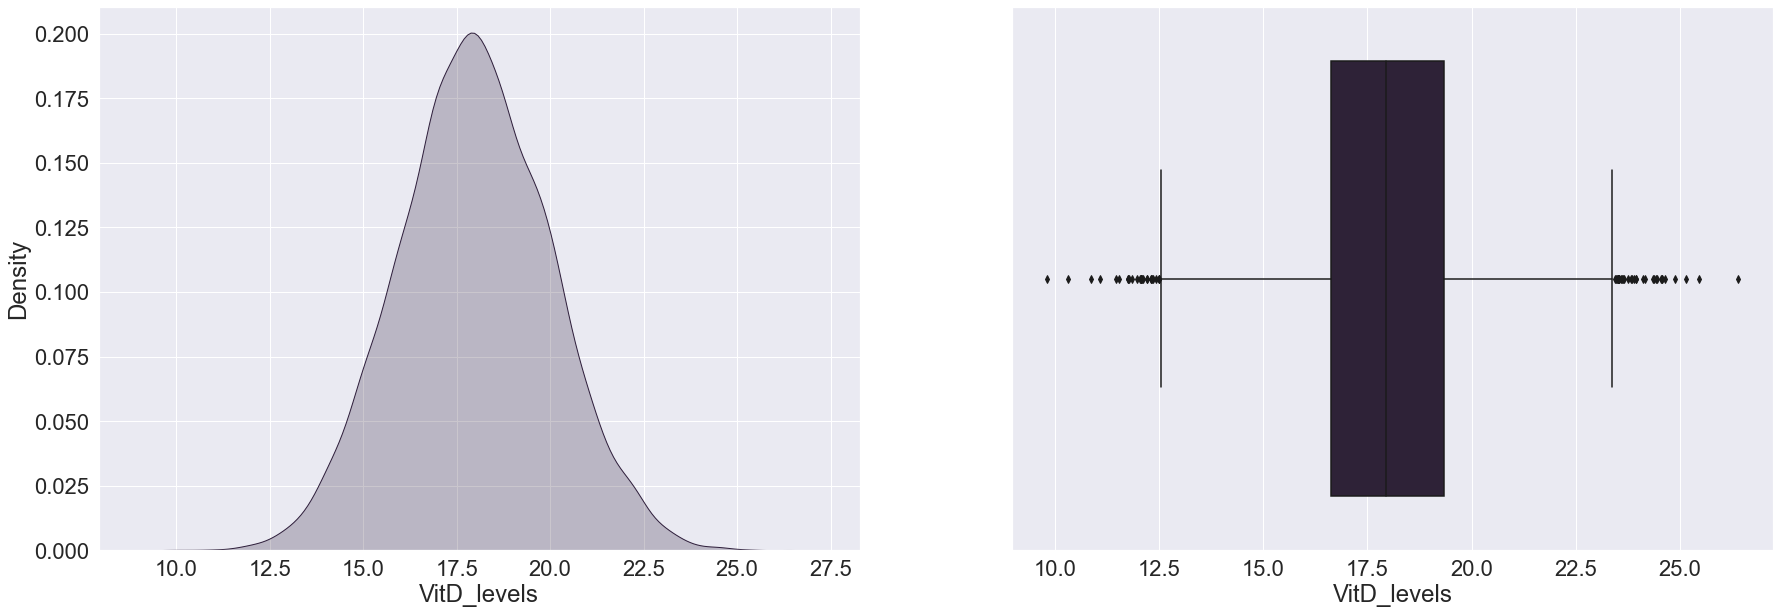

In [222]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))

_ = sns.kdeplot(data=df, x="VitD_levels", ax=axs[0], fill=True)
_ = sns.boxplot(data=df, x="VitD_levels", ax=axs[1])

plt.savefig("vit_d_levels.png", format="png")

### Initial_days (Continous)
___
  The number of days the patient stayed in the hospital during the initial visit
- bimodal distribution with modes around 5 and 65 initial days
- no outliers detected

In [214]:
display("Data Summary", pd.DataFrame(df.Initial_days.describe()))
print()
display(
    "Top 5 Frequently Occuring Values",
    pd.DataFrame(
        df.Initial_days.round().value_counts().sort_values(ascending=False).head()
    ),
)
print()
display("Mode", df.Initial_days.round().mode()[0])

'Data Summary'

,Initial_days
count,10000.000000
mean,34.455299
std,26.309341
min,1.001981
25%,7.896215
50%,35.836244
75%,61.161020
max,71.981490


'Top 5 Frequently Occuring Values'

,Initial_days
3.0,381
2.0,368
4.0,356
6.0,355
5.0,354


'Mode'

3.0

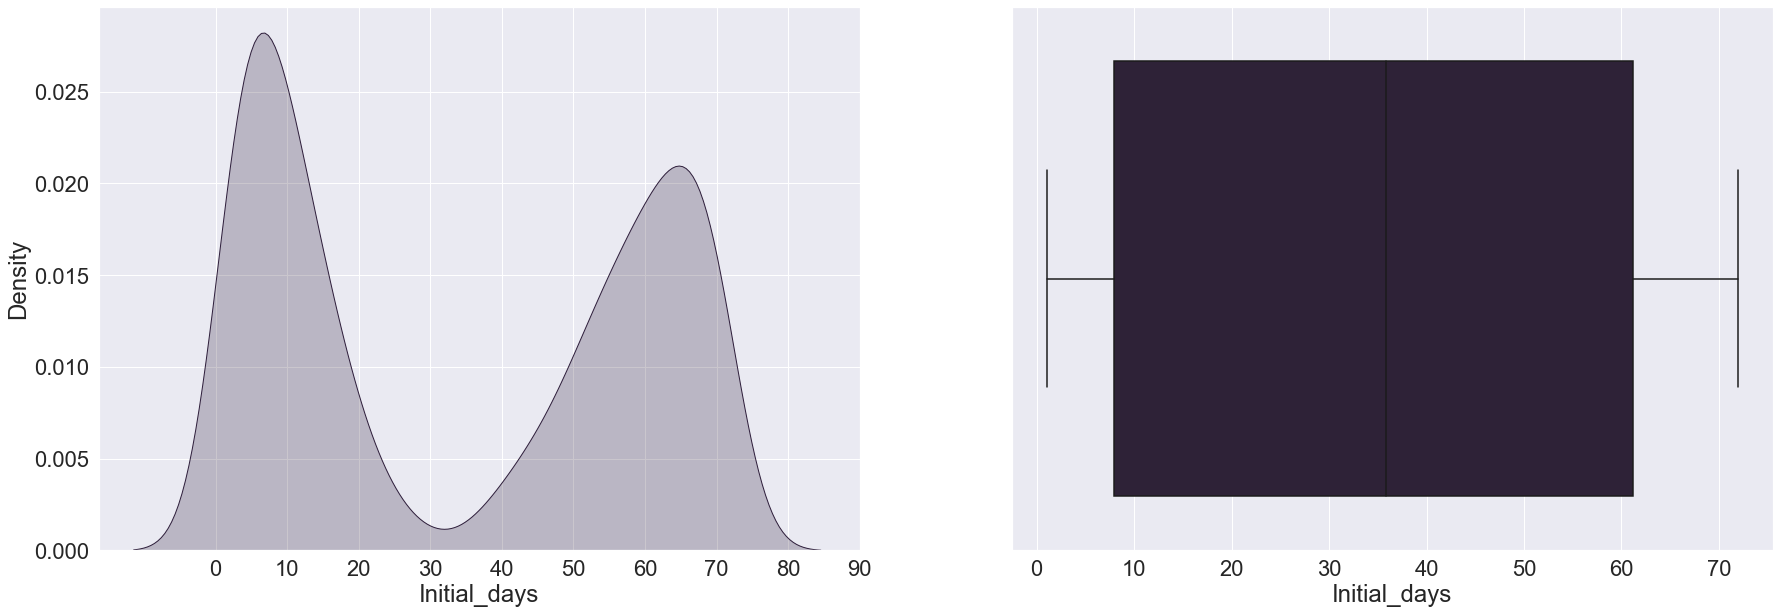

In [215]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))

_ = sns.kdeplot(data=df, x="Initial_days", ax=axs[0], fill=True).set_xticks(
    range(0, 100, 10)
)
_ = sns.boxplot(data=df, x="Initial_days", ax=axs[1])
plt.savefig("initial_days.png", format="png")

### Services (Categorical)
___
#  Primary service the patient received while hospitalized blood work, intravenous, CT scan, MRI ( the patient may have received more services, but only the primary service is reported
# - Blood Work is the most frequently observed primary service

,Services
count,10000
unique,4
top,Blood Work
freq,5265


,Services,Pct
Blood Work,5265,52.65
Intravenous,3130,31.30
CT Scan,1225,12.25
MRI,380,3.80


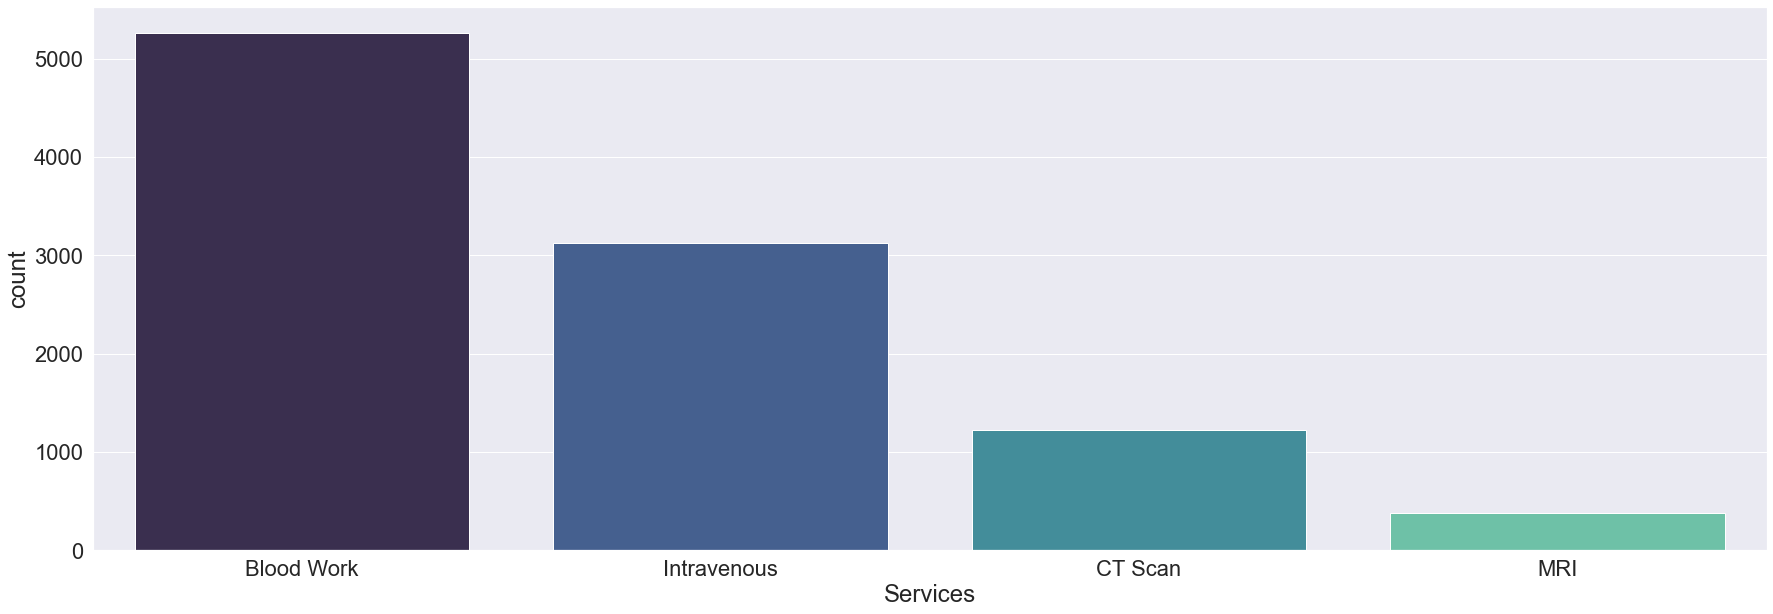

In [159]:
display(pd.DataFrame(df.Services.describe()))

c = pd.DataFrame(df.Services.value_counts())
c["Pct"] = (df.Services.value_counts(normalize=True) * 100).round(2)
display(c)


fig, axs = plt.subplots(figsize=(30, 10))

_ = sns.countplot(x=df.Services, palette=cmap)

plt.savefig("services.png", format="png")

### BackPain (Categorical)
---
#  Whether the patient has chronic back pain yes, no
# - No is the most common answer with 58.9% patients indicating they don't have chronic back pain

,BackPain
count,10000
unique,2
top,No
freq,5886


,BackPain,Pct
No,5886,58.86
Yes,4114,41.14


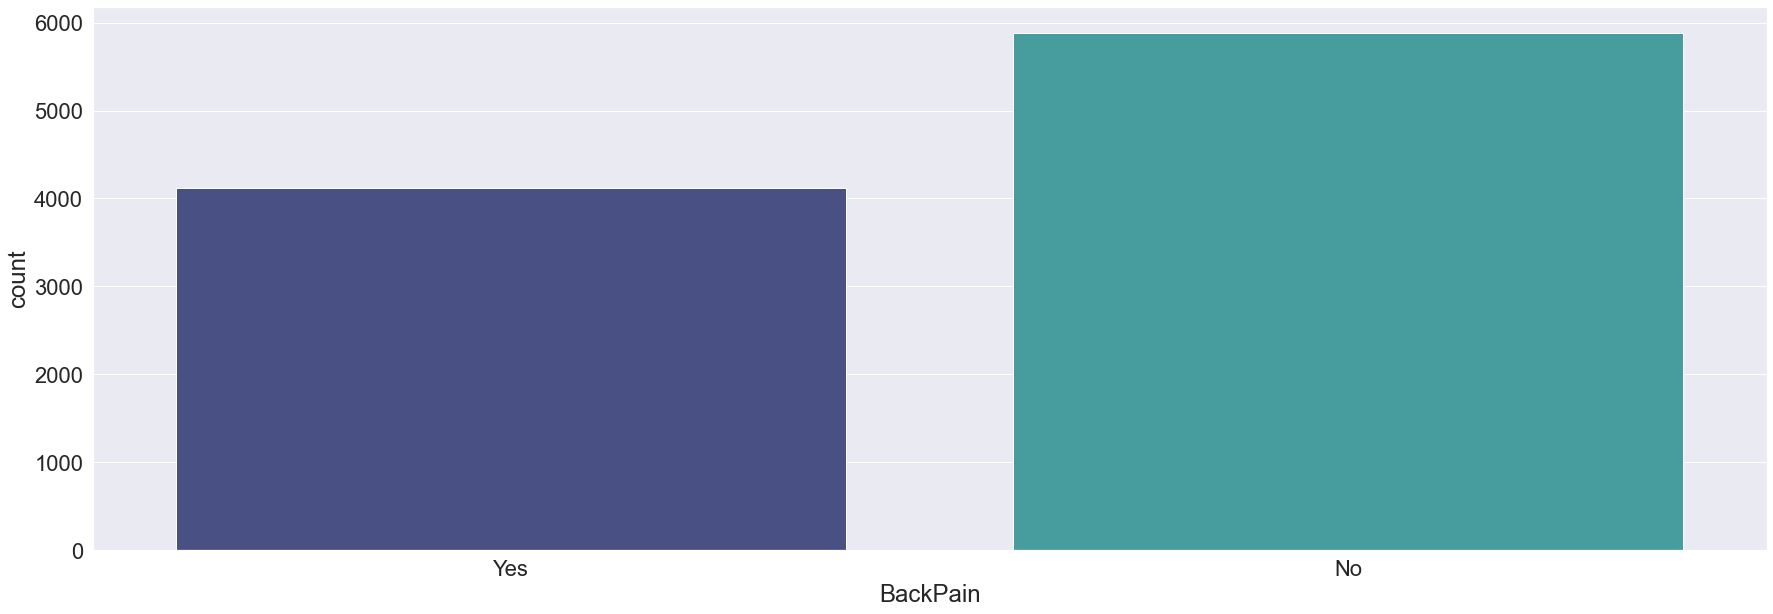

In [160]:
display(pd.DataFrame(df.BackPain.describe()))


c = pd.DataFrame(df.BackPain.value_counts())
c["Pct"] = (df.BackPain.value_counts(normalize=True) * 100).round(2)
display(c)

fig, axs = plt.subplots(figsize=(30, 10))

_ = sns.countplot(x=df.BackPain, palette=cmap)

plt.savefig("backpain.png", format="png")

# C1:VISUAL OF FINDINGS
---
The submission accurately represents the distribution of the variables in part C.

### 1. Represent your findings in Part C, visually as part of your submission.
 

Note: To draw a graph or visualization, you may use one or a combination of the following:

- A spreadsheet program, such as Excel (*.xls)

- A graphics program, such as Paint (*.jpeg, *.gif)

- A word-processing program, such as Word (*.rtf) 

- A scanned hand-drawn graph (*.jpeg, *.gif)



Text(1418.1470588235295, 0.5, 'Diabetes')

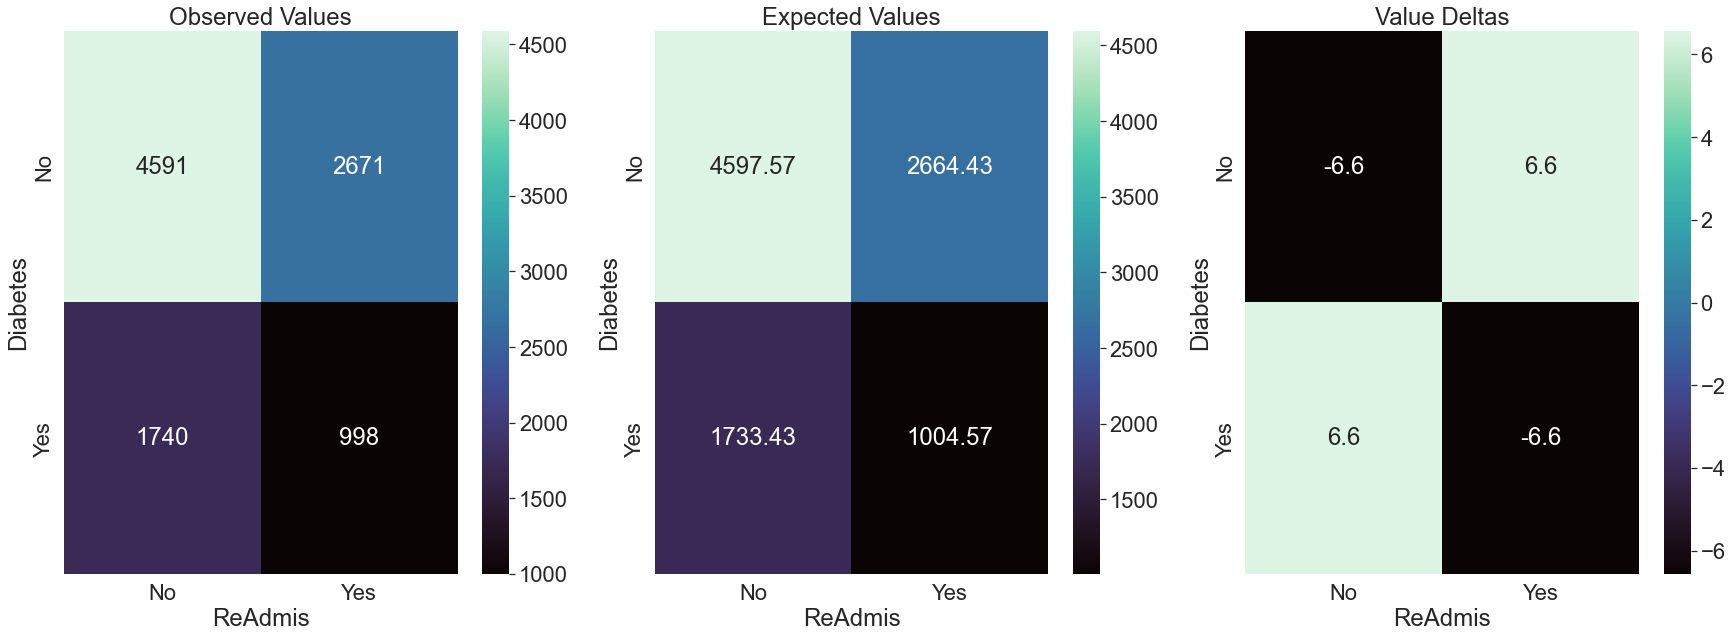

# D:BIVARIATE STATISTICS
---
The submission accurately identifies the distribution of 2 continuous and 2 categorical variables using bivariate statistics.

Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

So after reading Ch. 1 of the Practical Statistics book I think I understand better what it's asking for. In this case, the bivariate statistic would be a contingency table.

You found your answer, but just to add a few things. Univariate = 1 variable, Bivariate = 2 variables, Multivariate = 3 or more variables. That's all that means. So bivariate statistics would be the stats of 2 variables: Michael and Richard. The distribution would be: 1 Michael and 1 Richard. The next step would be the relationship between Michael and Richard. That's correlation.

This is the same as Part C except that you are explaining the relationship between the two variables.

Write a small paragraph describing your variables. I listed my as skewed, uniform, binomial etc. I also included the counts of the categorical variables and info like the mean, standard deviation, the min, and max for the continuous variables. It must have worked because they passed me.

You may use any of the variables you choose.

- Scatterplot is a good choice

### Initial Days and Total Charge (Two Continuous Variables)
---
- Initial_days represents the number of days the patient stayed in the hospital during the initial visit.
- TotalCharge represents the amount charged to the patient daily This value reflects an average per patient based on the total charge divided by the number of days. hospitalized This amount reflects the typical charges billed to patients not including specialized treatments.

- Both are bimodal distributions. The most common Initial Days range are approximately between 0-10 days and between 50-60 days.
The most common Total Charges ranged approximately between $2,000-$3,000 and between $6,000-$8,000.

A Pearson correlation coefficient of 0.98764 indicates a strong positive correlation between these features. As the number of initial days increases, so does the Total Charge. Additionally, patients that were readmitted had a longer initial stay and have a higher total charge compared to patients that were not readmitted.

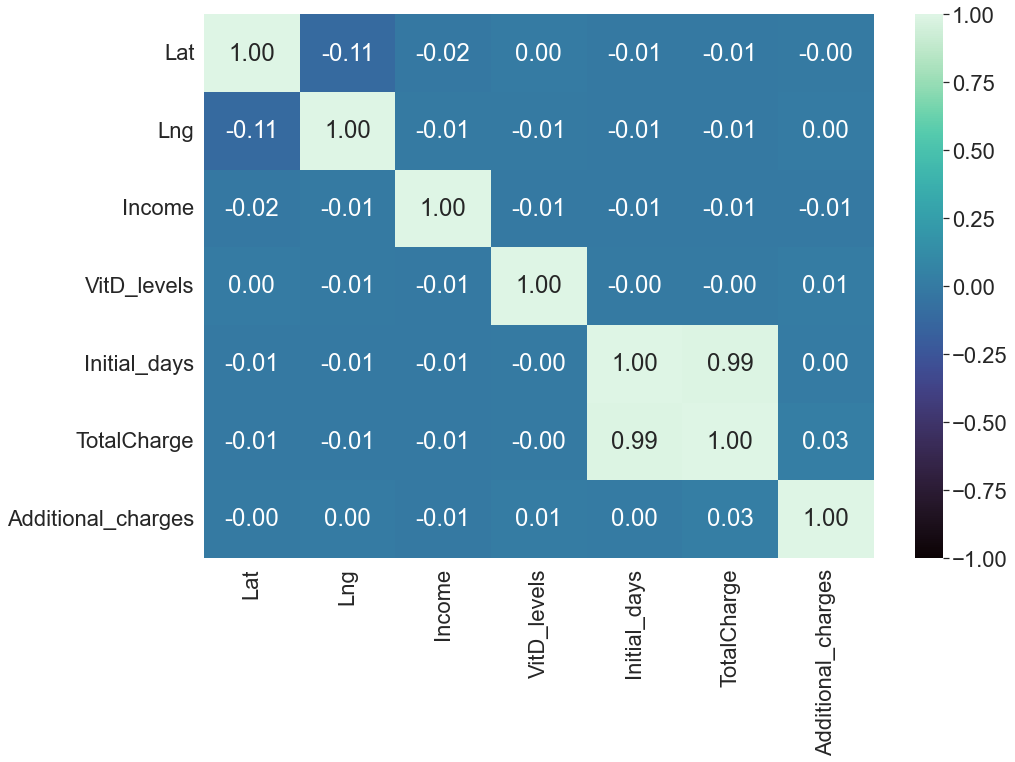

In [137]:
fig, axs = plt.subplots(figsize=(15, 10))
_ = sns.heatmap(
    df.select_dtypes(["float64"]).corr(),
    vmax=1,
    vmin=-1,
    cmap="mako",
    annot=True,
    fmt=".2f",
)

In [178]:
display("Summary", df[["TotalCharge", "Initial_days"]].describe())
display("Correlation", df[["TotalCharge", "Initial_days"]].corr())

'Summary'

,TotalCharge,Initial_days
count,10000.000000,10000.000000
mean,5312.172769,34.455299
std,2180.393838,26.309341
min,1938.312067,1.001981
25%,3179.374015,7.896215
50%,5213.952000,35.836244
75%,7459.699750,61.161020
max,9180.728000,71.981490


'Correlation'

,TotalCharge,Initial_days
TotalCharge,1.00000,0.98764
Initial_days,0.98764,1.00000


In [177]:
display("Mode", pd.DataFrame(df[["TotalCharge", "Initial_days"]].round().mode()))
display("Variance", pd.DataFrame(np.log2(df[["TotalCharge", "Initial_days"]]).var()))

'Mode'

,TotalCharge,Initial_days
0,7654.0,3.0


'Variance'

,0
TotalCharge,0.407869
Initial_days,2.954556


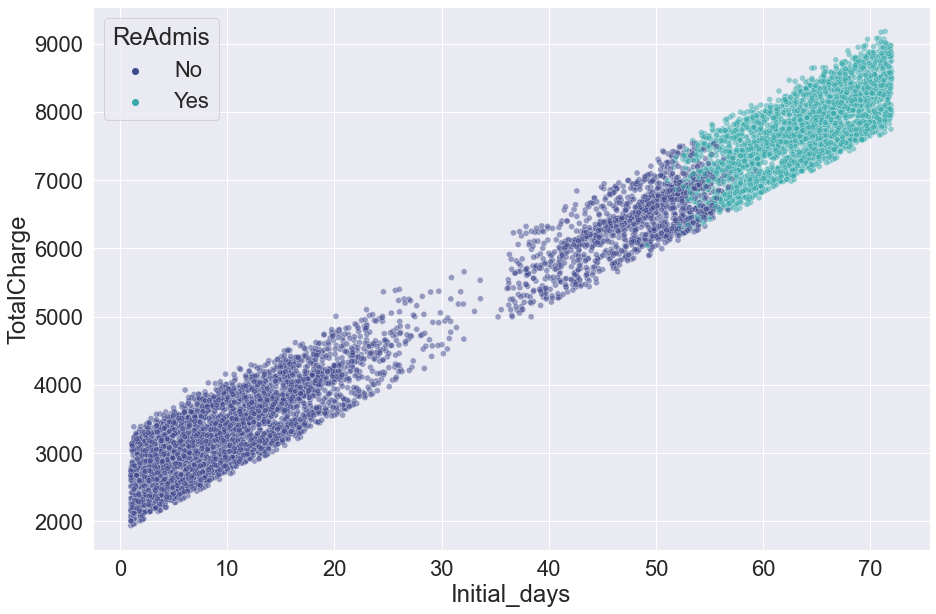

In [171]:
fig, axs = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    data=df, y="TotalCharge", x="Initial_days", hue="ReAdmis", alpha=0.5, palette=cmap
)
plt.savefig("total_charge_initial_days.png", format="png")

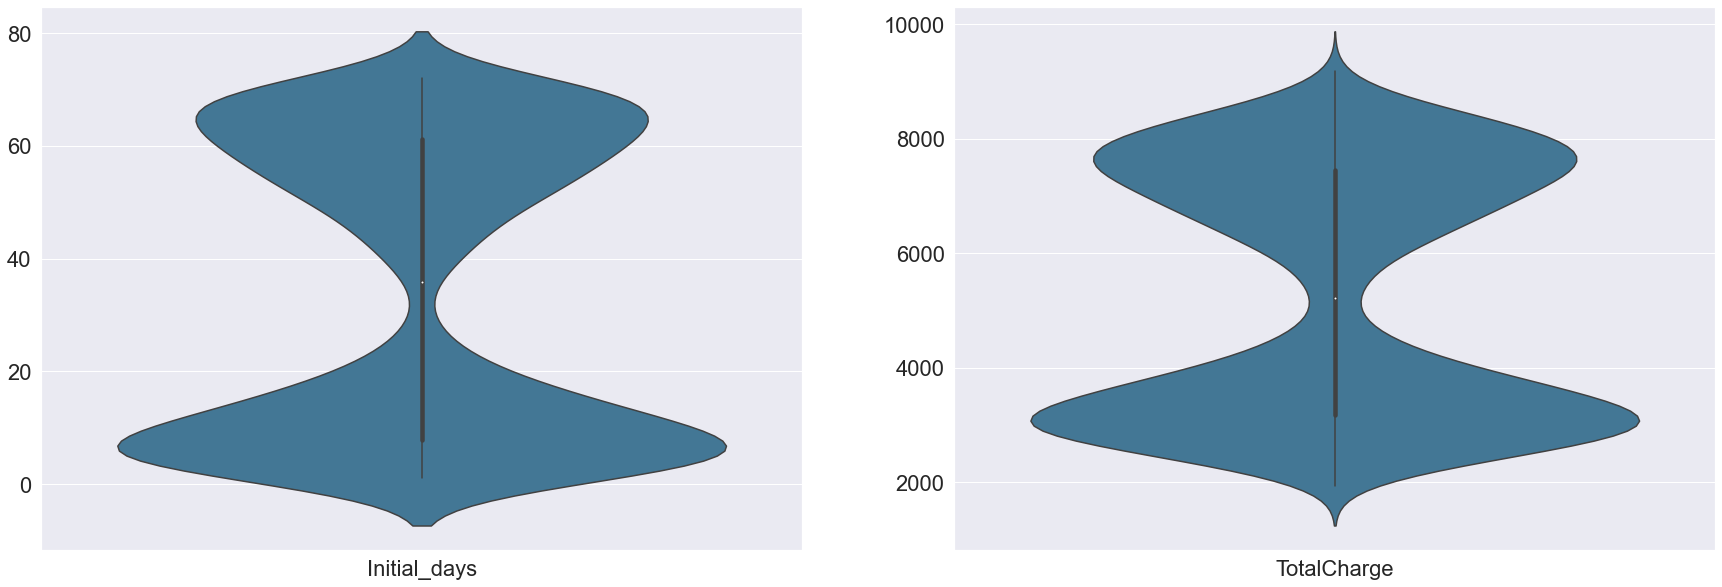

In [166]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))

_ = sns.violinplot(data=df[["Initial_days"]], ax=axs[0], palette=cmap)
_ = sns.violinplot(data=df[["TotalCharge"]], ax=axs[1], palette=cmap)

plt.savefig("total_charge_initial_days_boxes.png", format="png")

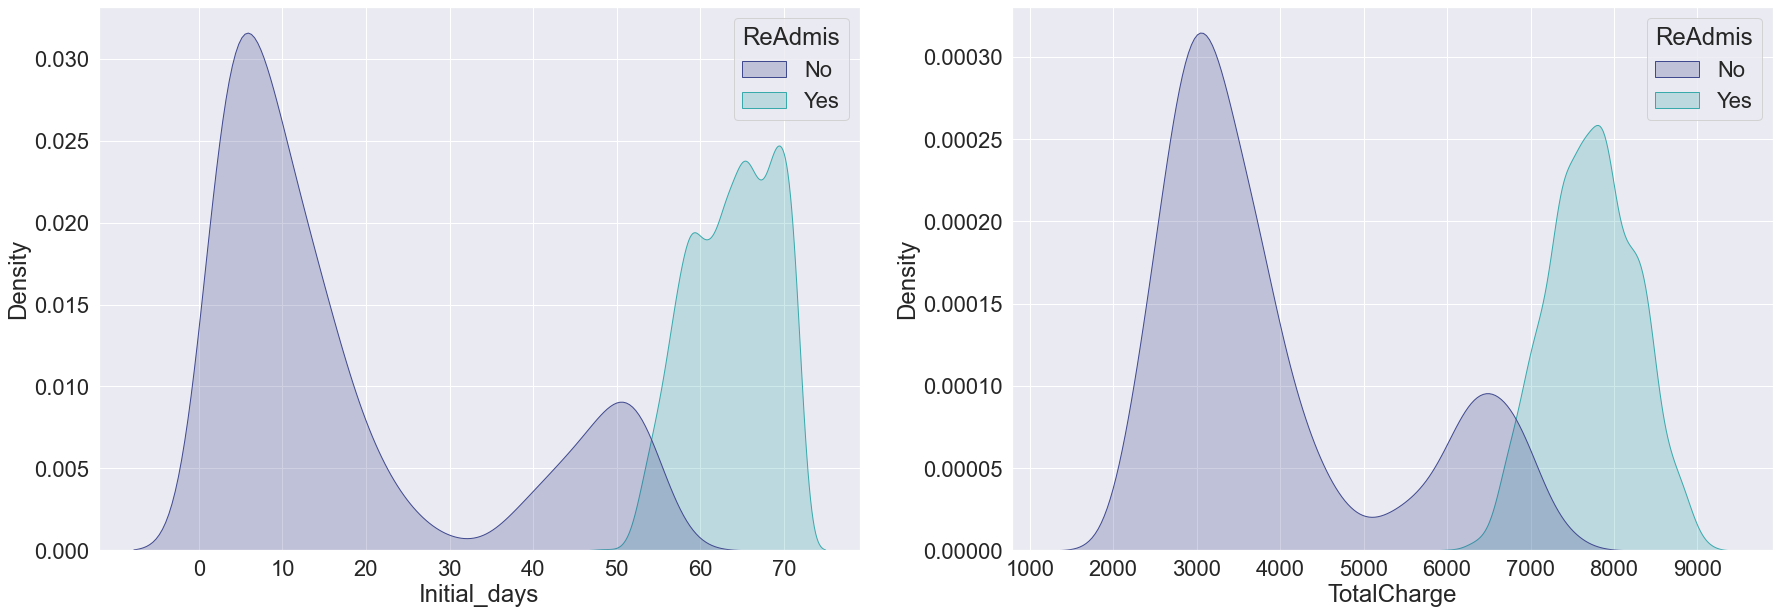

In [167]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))

fig = sns.kdeplot(
    data=df.round(),
    x="Initial_days",
    shade=True,
    hue="ReAdmis",
    ax=axs[0],
    palette=cmap,
).set_xticks(range(0, 75, 10))
fig = sns.kdeplot(
    data=df.round(), x="TotalCharge", shade=True, hue="ReAdmis", ax=axs[1], palette=cmap
).set_xticks(range(1000, 10000, 1000))
plt.savefig("total_charge_initial_days_kde.png", format="png")

In [144]:
from scipy.stats import gaussian_kde

display(gaussian_kde(df.Initial_days).evaluate(7)[0].round(4))

display(
    "Initial_days frequency",
    (df.Initial_days.round() // 10 * 10)
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    * 100,
)
display(
    "TotalCharge frequency",
    (df.TotalCharge.round() // 1000 * 1000)
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    * 100,
)

0.0282

'Initial_days frequency'

0.0     29.57
60.0    21.92
10.0    16.85
50.0    15.01
40.0     6.11
70.0     6.01
20.0     3.33
30.0     1.20
Name: Initial_days, dtype: float64

'TotalCharge frequency'

3000.0    25.11
7000.0    23.24
2000.0    18.93
6000.0    12.76
8000.0    11.29
4000.0     5.62
5000.0     2.92
9000.0     0.10
1000.0     0.03
Name: TotalCharge, dtype: float64

### Marital and Anxiety  (Two Categorical Variables)
---
- Marital status of the patient (or primary insurance holder) as reported on
admission information
- Anxiety: Whether the patient has an anxiety disorder yes, no

- Both categorical variables are fairly uniform distributions.

In [197]:
display(df[["Marital", "Anxiety"]].describe())

,Marital,Anxiety
count,10000,10000
unique,5,2
top,Widowed,No
freq,2045,6785


In [195]:
display("Marital Proportions", pd.DataFrame(df["Marital"].value_counts(normalize=True)))
display("Anxiety Proportions", pd.DataFrame(df["Anxiety"].value_counts(normalize=True)))

'Marital Proportions'

,Marital
Widowed,0.2045
Married,0.2023
Separated,0.1987
Never Married,0.1984
Divorced,0.1961


'Anxiety Proportions'

,Anxiety
No,0.6785
Yes,0.3215


In [189]:
pd.crosstab(df.Marital, df.Anxiety, margins=True, margins_name="Total")

Anxiety,No,Yes,Total
Marital,,,
Divorced,1327,634,1961
Married,1362,661,2023
Never Married,1372,612,1984
Separated,1330,657,1987
Widowed,1394,651,2045
Total,6785,3215,10000


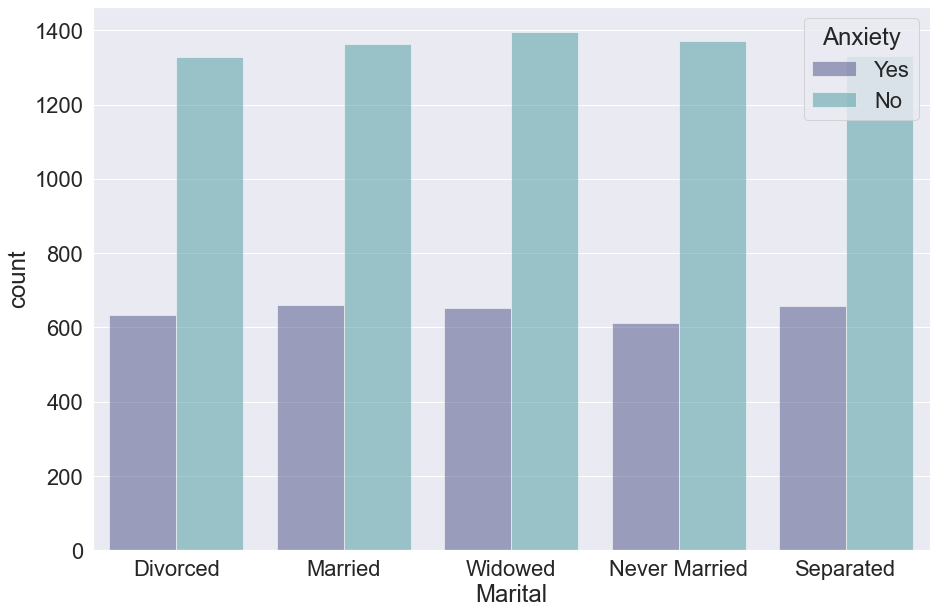

In [182]:
fig, axs = plt.subplots(figsize=(15, 10))

sns.countplot(data=df, x="Marital", hue="Anxiety", alpha=0.5, palette=cmap)
plt.savefig("marital_anxiety_count.png", format="png")

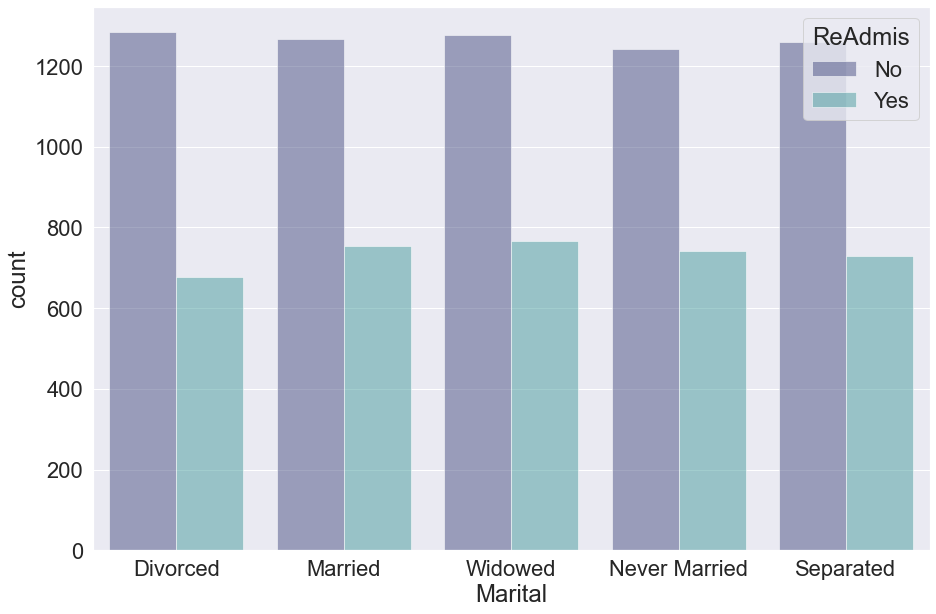

In [183]:
fig, axs = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, x="Marital", hue="ReAdmis", alpha=0.5, palette=cmap)
plt.savefig("marital_readmission_count.png", format="png")

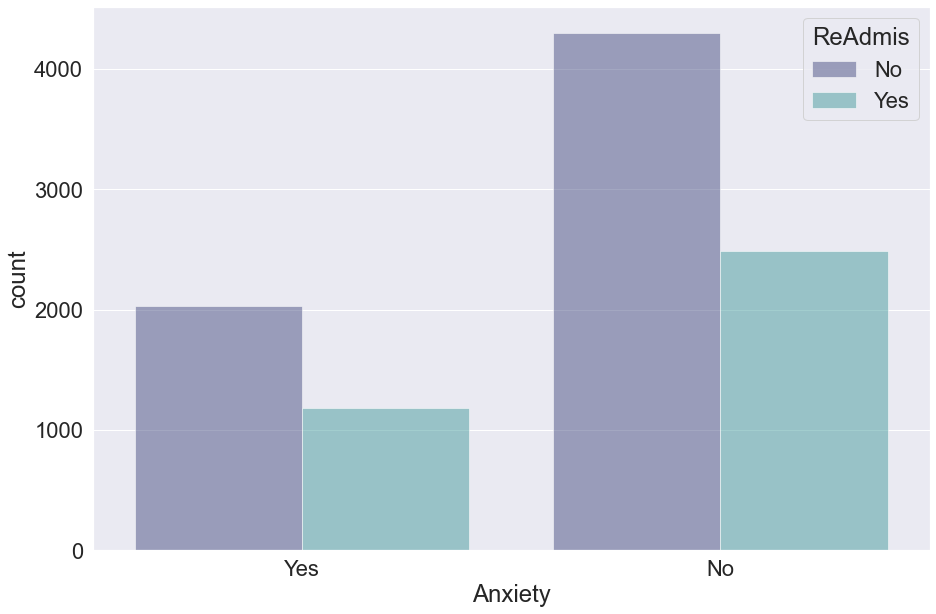

In [184]:
fig, axs = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, x="Anxiety", hue="ReAdmis", alpha=0.5, palette=cmap)
plt.savefig("anxiety_readmission_count.png", format="png")

# D1:VISUAL OF FINDINGS
---
The submission accurately represents the distribution of the variables in part D.

### 1. Represent your findings in Part D, visually as part of your submission.
 

Note: To draw a graph or visualization, you may use one or a combination of the following:

- A spreadsheet program, such as Excel (*.xls)

- A graphics program, such as Paint (*.jpeg, *.gif)

- A word-processing program, such as Word (*.rtf) 

- A scanned hand-drawn graph (*.jpeg, *.gif)

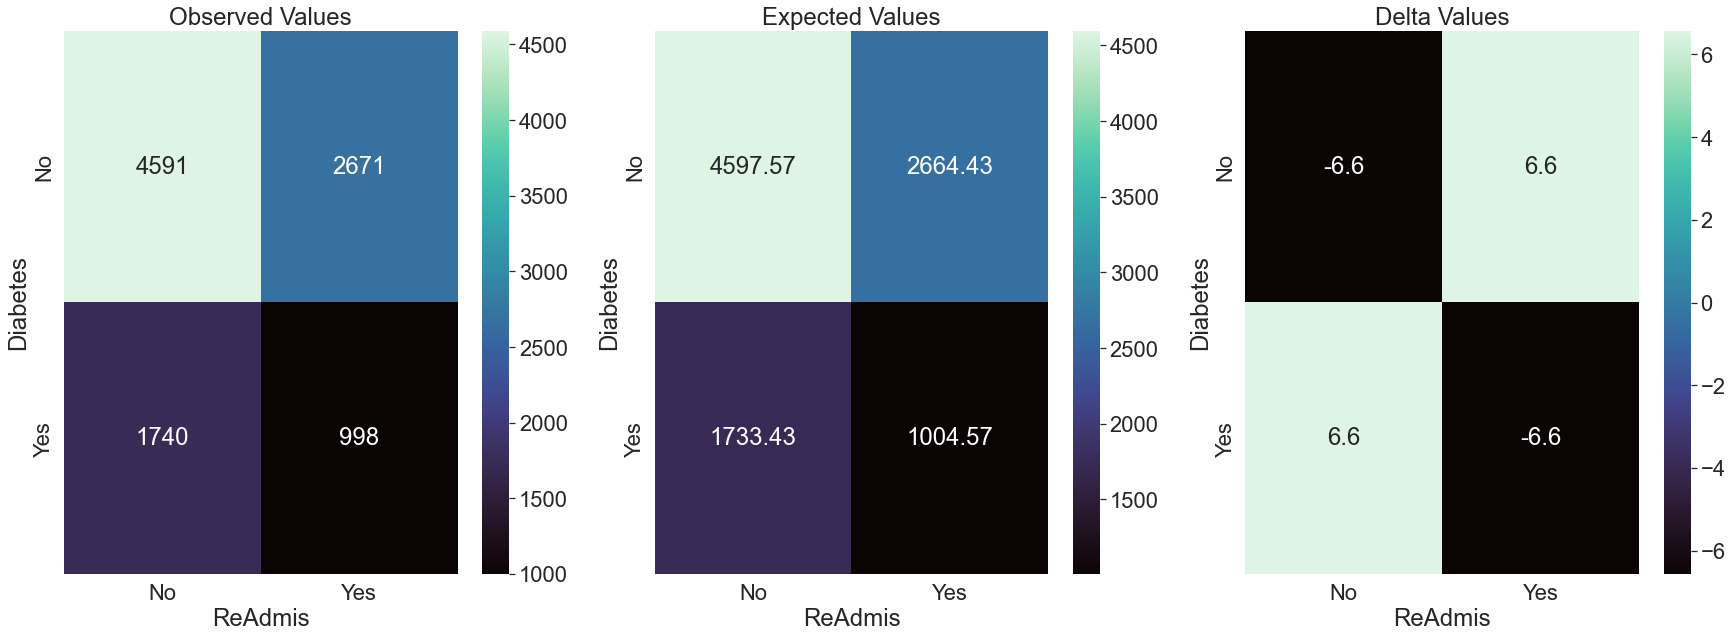

In [140]:
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))

sns.heatmap(table_no_total, annot=True, cmap=cmap, fmt="d", ax=axs[0]).set_title(
    "Observed Values"
)
sns.heatmap(expected_table, annot=True, cmap=cmap, fmt=".2f", ax=axs[1]).set_title(
    "Expected Values"
)
axs[1].set_xlabel("ReAdmis")
axs[1].set_ylabel("Diabetes")

sns.heatmap(
    table_no_total - expected_table, annot=True, cmap=cmap, ax=axs[2]
).set_title("Delta Values")
axs[2].set_xlabel("ReAdmis")
axs[2].set_ylabel("Diabetes")

plt.savefig("hypothesis_test.png", format="png")

,BackPain
count,10000
unique,2
top,No
freq,5886


# E1:RESULTS OF ANALYSIS
---
The discussion includes accurate and complete results of the hypothesis test.

Summarize the implications of your data analysis by doing the following:

### 1.  Discuss the results of the hypothesis test.



- No significant difference in proportions of diabetic patients found between patient readmission groups

The p-value obtained from our Chi-Square Test for Homogeneity was 0.7775 which is signifcantly greater than our alpha value of 0.05. Therefore, we conclude that there is no significant difference in proportions of diabetic patients found between the readmitted patients sample group and the non-readmitted sample group.

- this appears to indicate that the proportion of observed readmitted diabetic patients
- frequency counts are distributed nearly identically across readmitted patients and non-readmitted patient groups.
- to determine whether observed sample frequencies differ significantly from expected frequencies specified in the null hypothesis

- the sample findings are likely, given the null hypothesis, so we'll accept the null hypothesis and conclude that there isn't a relationship between the observed Diabetic patients and readmitted patients
- if there were no relationship between the two variables, we would expect to see the number of students who got in trouble be evenly distributed across both genders.

# E2:LIMITATIONS OF ANALYSIS
---
The explanation includes the limitations of the data analysis and does not include limitations that do not apply to the analysis.

Summarize the implications of your data analysis by doing the following:

### 2.  Discuss the limitations of your data analysis.



The Limitations of the Chi-Square Test
There are two limitations to the chi-square test about which you should be aware.
- First, the chi-square test is very sensitive to sample size. With a large enough sample, even trivial relationships can appear to be statistically significant.
- When using the chi-square test, you should keep in mind that "statistically significant" doesn't necessarily mean "meaningful."
- Second, remember that the chi-square can only tell us whether two variables are related to one another. It does not necessarily imply that one variable has any causal effect on the other. In order to establish causality, a more detailed analysis would be required. (https://soc.utah.edu/sociology3112/chi-square.php)

# E3:RECOMMENDED COURSE OF ACTION
---
The recommendation includes both a response to the question from part A1 and specific actions that could be taken in response to the analysis. The recommendation is relevant to the situation and question and would plausibly address the situation and question.

Summarize the implications of your data analysis by doing the following:

### 3.  Recommend a course of action based on your results.


The answer to the question "Does the proportion of diabetic patients differ between those patients that were readmitted within a month of release?" is no. The proportion of diabetic patients between readmitted and non-readmitted patients groups is nearly identical. As a result, I would prioritize running similiar hypothesis tests for other patients groups to determine if there are other patient groups that are more likely to be readmitted.

- This initial test doesn't guarantee that diabetes and readmission aren't correlated, but this simple test if a useful way to quickly uncover patterns related to readmitted patients


# F:VIDEO
---
The submission provides a Panopto video recording that accurately demonstrates the functionality of the code and summarizes the tools used.

# G:SOURCES FOR THIRD-PARTY CODE
---
The submission lists all web sources used to acquire third-party code, and the referenced web sources are reliable.

Reference the web sources used to acquire segments of third-party code to support the analysis. 

https://app.datacamp.com/learn/custom-tracks/custom-d207-exploratory-data-analysis
https://pbpython.com/pandas-crosstab.html
https://stattrek.com/chi-square-test/homogeneity.aspx
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
https://www.reneshbedre.com/blog/chi-square-test.html
https://youtu.be/HwD7ekD5l0g
https://stackoverflow.com/a/25394017
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
https://www.reneshbedre.com/blog/chi-square-test.html

# H:SOURCES
---
The submission includes in-text citations for sources that are properly quoted, paraphrased, or summarized and a reference list that accurately identifies the author, date, title, and source location as available.

Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

https://www.mathsisfun.com/data/chi-square-table.html
https://www.mathsisfun.com/data/chi-square-calculator.html
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4731880/
https://en.wikipedia.org/wiki/Hospital_readmission
https://soc.utah.edu/sociology3112/chi-square.php